In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

In [3]:
data = pd.read_csv("C:/Users/Kaushik/Documents/Kaggle Datasets/Machine_Learning/Classification Datasets/Heart Diseases UCI/heart.csv")

In [4]:
data.count()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


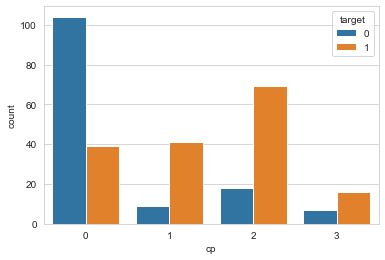

In [6]:
#plot of pleople who had chest pain of different types
sns.set_style('whitegrid')
sns.countplot(x='cp',hue='target',data = data)

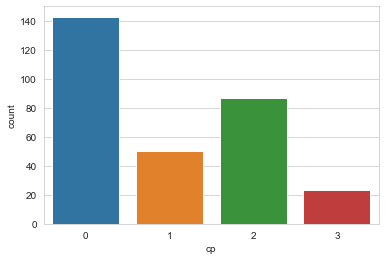

In [7]:
#plot of pleople who had chest pain of different types
sns.set_style('whitegrid')
sns.countplot(x='cp',data = data)

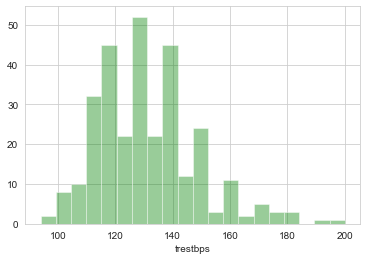

In [8]:
sns.distplot(data['trestbps'],kde=False,bins=20,color = 'green')

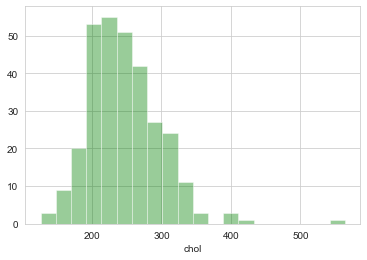

In [9]:
sns.distplot(data['chol'],kde=False,bins=20,color = 'green')

In [10]:
# No data cleaning required because all the data is present.

In [11]:
#Splitting of the data 
X_train,X_test,y_train,y_test = train_test_split(data.drop('target',axis=1),data['target'],test_size = 0.25,random_state=2)

In [12]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3
170,56,1,2,130,256,1,0,142,1,0.6,1,1,1
214,56,1,0,125,249,1,0,144,1,1.2,1,1,2


In [13]:
# importing and creating multiple models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

In [14]:
tree_mod = DecisionTreeClassifier().fit(X_train,y_train)
rf_mod = RandomForestClassifier().fit(X_train,y_train)
svm_mod = svm.SVC(kernel = 'linear', C=1,probability=True).fit(X_train,y_train)
logreg_mod = LogisticRegression(solver='lbfgs').fit(X_train,y_train)

C:\Users\Kaushik\Anaconda3\envs\xai\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [15]:
# now predicting with the test data
y_pred_class_tree = tree_mod.predict(X_test)
y_pred_class_rf = rf_mod.predict(X_test)
y_pred_class_svm = svm_mod.predict(X_test)
y_pred_class_logreg = logreg_mod.predict(X_test)

In [16]:
tree_acc = metrics.accuracy_score(y_test,y_pred_class_tree)
rf_acc = metrics.accuracy_score(y_test,y_pred_class_rf)
svm_acc = metrics.accuracy_score(y_test,y_pred_class_svm)
log_acc = metrics.accuracy_score(y_test,y_pred_class_logreg)

In [17]:
tree_sens = metrics.recall_score(y_test,y_pred_class_tree)
rf_sens = metrics.recall_score(y_test,y_pred_class_rf)
svm_sens = metrics.recall_score(y_test,y_pred_class_svm)
log_sens = metrics.recall_score(y_test,y_pred_class_logreg)

In [18]:
print('DTree Accuracy = ',tree_acc)
print('RandomForest Accuracy = ',rf_acc)
print('SVM Accuracy = ',svm_acc)
print('logisticReg Accuracy = ',log_acc)


print('DTree Sensitivity = ',tree_sens)
print('RandomForest Sensitivity = ',rf_sens)
print('SVM Sensitivity = ',svm_sens)
print('logisticReg Sensitivity = ',log_sens)

DTree Accuracy =  0.868421052631579
RandomForest Accuracy =  0.881578947368421
SVM Accuracy =  0.8947368421052632
logisticReg Accuracy =  0.9210526315789473
DTree Sensitivity =  0.9
RandomForest Sensitivity =  0.925
SVM Sensitivity =  0.975
logisticReg Sensitivity =  1.0


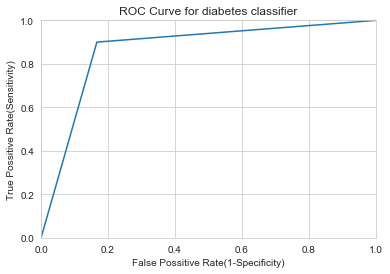

In [19]:
# After deciding the algo based on sensitivity, We are interested in who ever has diabetes
y_pred_prob_log = logreg_mod.predict_proba(X_test)[:,1]
y_pred_prob_tree = tree_mod.predict_proba(X_test)[:,1]
y_pred_prob_rf = rf_mod.predict_proba(X_test)[:,1]
y_pred_prob_svm = svm_mod.predict_proba(X_test)[:,1]

# Important: First val is True value, Second is predicted probabilities
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred_prob_tree)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve for diabetes classifier')
plt.xlabel('False Possitive Rate(1-Specificity)')
plt.ylabel('True Possitive Rate(Sensitivity)')
plt.grid(True)

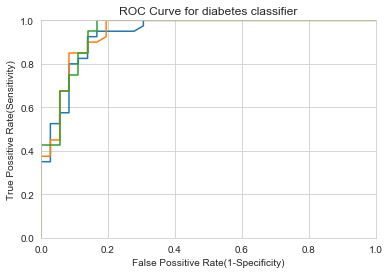

In [20]:
# Important: First val is True value, Second is predicted probabilities
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred_prob_rf)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve for diabetes classifier')
plt.xlabel('False Possitive Rate(1-Specificity)')
plt.ylabel('True Possitive Rate(Sensitivity)')
plt.grid(True)

# Important: First val is True value, Second is predicted probabilities
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred_prob_svm)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve for diabetes classifier')
plt.xlabel('False Possitive Rate(1-Specificity)')
plt.ylabel('True Possitive Rate(Sensitivity)')
plt.grid(True)

# Important: First val is True value, Second is predicted probabilities
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred_prob_log)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve for diabetes classifier')
plt.xlabel('False Possitive Rate(1-Specificity)')
plt.ylabel('True Possitive Rate(Sensitivity)')
plt.grid(True)

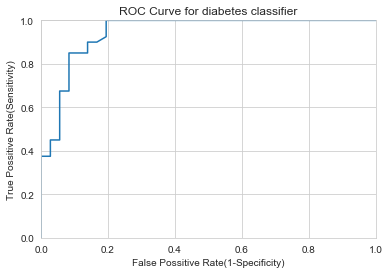

In [21]:

# Important: First val is True value, Second is predicted probabilities
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred_prob_svm)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve for diabetes classifier')
plt.xlabel('False Possitive Rate(1-Specificity)')
plt.ylabel('True Possitive Rate(Sensitivity)')
plt.grid(True)


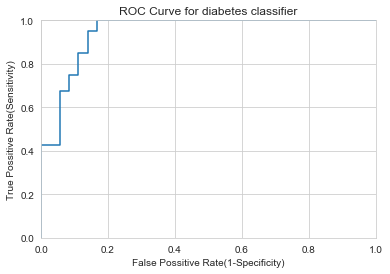

In [22]:

# Important: First val is True value, Second is predicted probabilities
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred_prob_log)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve for diabetes classifier')
plt.xlabel('False Possitive Rate(1-Specificity)')
plt.ylabel('True Possitive Rate(Sensitivity)')
plt.grid(True)

In [23]:
metrics.roc_auc_score(y_test,y_pred_prob_tree)

0.8666666666666666

In [24]:

metrics.roc_auc_score(y_test,y_pred_prob_rf)

0.9378472222222222

In [25]:

metrics.roc_auc_score(y_test,y_pred_prob_svm)

0.9447916666666667

In [26]:

metrics.roc_auc_score(y_test,y_pred_prob_log)

0.9465277777777779